# Resume Analysis using SVD and Saliency Scores

This notebook demonstrates how to analyze resumes using Singular Value Decomposition (SVD) and Saliency Scores. The goal is to extract important keywords and sentences from each resume to help recruiters quickly identify key skills and experiences of applicants.

Dataset was taking from [Resumes dataset](https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset?resource=download)

Resumes_html column was removed and `filter_category.py` script was used to filter the resumes by `INFORMATION-TECHNOLOGY` category.


In [1]:
!pip install scikit-learn
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

## Loading the dataset

In [2]:
filename = "filtered_resumes.csv"
df = pd.read_csv(filename)

## SVD and Saliency Scores

SVD is a matrix factorization technique that decomposes a matrix into three other matrices:

\begin{equation}
\huge A = U \Sigma V^{T}
\end{equation}

where:
- $A$ is the input matrix (in our case, the TF-IDF matrix)
- $U$ is the left singular matrix, representing the relationship between terms and latent semantic features
- $\Sigma$ is the diagonal matrix of singular values, representing the strength of each latent semantic feature
- $V^T$ is the right singular matrix, representing the relationship between documents (resumes) and latent semantic features

Saliency scores are computed using the absolute values of the first left singular vector of the SVD. This helps us identify the most important terms and sentences in the data.


In [3]:
def process_text(text):
    return text.strip().lower()

vectorizer = TfidfVectorizer(stop_words='english', preprocessor=process_text)
term_sentence_matrix = vectorizer.fit_transform(df['Resume_str'])

n_components = 120
svd = TruncatedSVD(n_components=n_components, random_state=42)
reduced_matrix = svd.fit_transform(term_sentence_matrix)

term_saliency_scores = np.abs(svd.components_[0])
sentence_saliency_scores = np.abs(reduced_matrix[:, 0])

## Term-sentence matrix

In [4]:
print(term_sentence_matrix.shape)

(120, 8382)


## SVD Matrices
### $U$ (Left Singular Matrix):

In [5]:
print(reduced_matrix)

[[ 3.38273208e-01  3.94540418e-02 -3.57957895e-02 ...  7.91139292e-03
  -3.81380599e-05  3.21525276e-04]
 [ 3.14206698e-01 -6.83841153e-02 -6.80368478e-02 ...  4.97088754e-02
  -6.07805460e-04  2.43506479e-04]
 [ 3.45935448e-01 -1.21929202e-01 -1.24802007e-01 ...  3.92747645e-02
   1.65025436e-03  2.27195037e-04]
 ...
 [ 4.97836269e-01 -6.76897852e-02 -6.00069857e-02 ... -8.50439599e-04
  -5.63591490e-02  3.78379881e-04]
 [ 3.01614992e-01  1.27849148e-01  6.62893961e-02 ...  1.29539748e-04
   1.09741174e-02  3.36131552e-04]
 [ 3.30901078e-01  1.49979582e-01 -1.28428470e-01 ...  2.89685042e-02
  -6.69554673e-03  5.22616148e-05]]


In [6]:
print("Simetric/Squared matrix", reduced_matrix.shape)

Simetric/Squared matrix (120, 120)


### $\Sigma$ (Singular Values):

In [7]:
print(svd.singular_values_)

[4.18131055 1.78375739 1.59418701 1.47530052 1.30007421 1.23651484
 1.21312617 1.19287729 1.14825082 1.13962885 1.12729898 1.10361835
 1.09656775 1.07522681 1.06598309 1.06261842 1.05487828 1.04943634
 1.03880901 1.03392268 1.02978537 1.02845417 1.02156666 1.01899536
 1.01612799 1.01264845 1.00872697 1.00171552 0.99523312 0.99102041
 0.98462334 0.98384267 0.98150434 0.97724676 0.97361656 0.96647977
 0.96190607 0.96001061 0.95586343 0.9519694  0.94834246 0.94710396
 0.94109126 0.93876076 0.93501879 0.9325123  0.9280971  0.92605661
 0.92292035 0.91923487 0.91524845 0.91411997 0.91146504 0.90698629
 0.90332124 0.90045318 0.89813671 0.89613966 0.89314848 0.88981002
 0.88434176 0.88279439 0.8810127  0.87785732 0.87516747 0.87136477
 0.86938762 0.86795759 0.86587461 0.86204894 0.86000231 0.85816624
 0.85514195 0.84835018 0.8474875  0.84192648 0.84097915 0.83770141
 0.83618448 0.83190857 0.83072569 0.82516241 0.82101333 0.81783926
 0.81586761 0.8132583  0.81019853 0.80875547 0.80713507 0.8058

In [8]:
print("∑ Singular Values matrix", svd.singular_values_.shape)

∑ Singular Values matrix (120,)


### $V^T$(Right Singular Matrix)

In [9]:
print(svd.components_)

[[ 2.90531722e-03  2.13401467e-02  3.95436546e-04 ...  2.71406077e-03
   2.44749943e-04  1.24412614e-03]
 [-6.29478649e-03  5.44348526e-03  9.21032587e-04 ... -7.09613336e-03
   4.56294153e-04  6.34291890e-04]
 [ 1.77940754e-03 -4.00951169e-03  5.97880316e-04 ... -2.04739404e-03
  -2.28579468e-04 -1.25721767e-03]
 ...
 [ 2.94074128e-02  2.02423308e-02  6.14777607e-06 ...  3.60551415e-03
  -3.76250939e-04  1.19212753e-06]
 [ 1.43390895e-03  1.56228444e-02  5.51063947e-04 ... -4.70082163e-04
  -7.35123857e-05 -3.81426131e-03]
 [-1.59727262e-03  3.24771176e-03  3.38609484e-04 ... -7.39794760e-04
   5.23689361e-04 -3.22566335e-04]]


In [10]:
print("∑ Right Singular matrix", svd.components_.shape)

∑ Right Singular matrix (120, 8382)


## Saliency Scores

In [11]:
def plot_saliency_scores(scores, title):
    plt.figure(figsize=(10, 5))
    plt.plot(scores)
    plt.xlabel("Index")
    plt.ylabel("Saliency Score")
    plt.title(title)
    plt.show()

### Term Saliency Scores

\begin{equation}
\huge (a_{1j}, a_{2j}, …a_{mj})^T
\end{equation}

\begin{equation}
\huge u_i \alpha \sum_{j=1} ^{n} a_{ij}v_j, i = 1, 2,...,m
\end{equation}

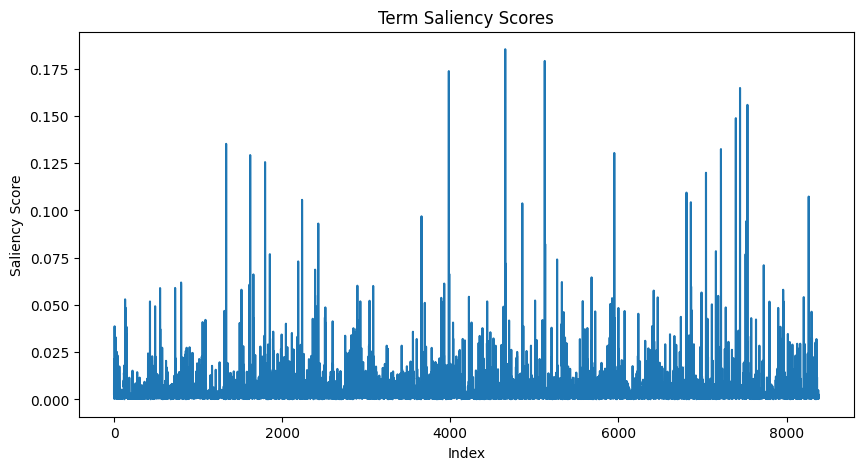

In [12]:
plot_saliency_scores(term_saliency_scores, "Term Saliency Scores")

### Sentence Saliency Scores

\begin{equation}
\huge (a_{1i}, a_{2i}, …a_{ni})^T
\end{equation}

\begin{equation}
\huge v_j \alpha \sum_{i=1} ^{m} a_{ij}u_i, j = 1, 2,...,n
\end{equation}

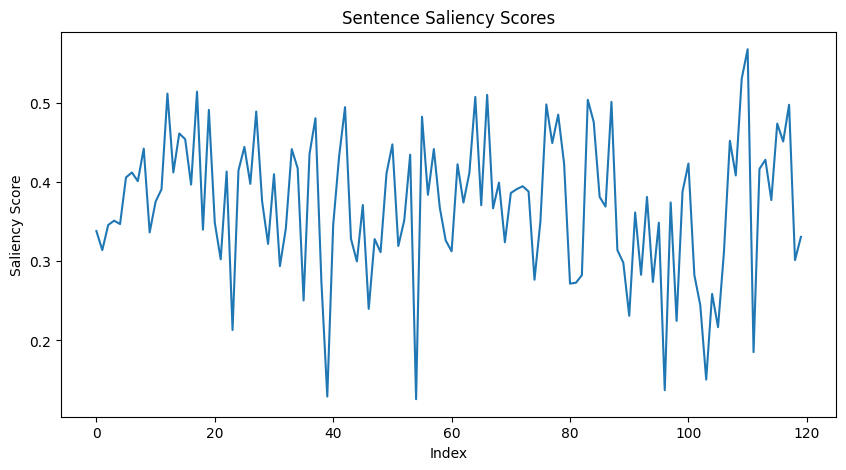

In [13]:
plot_saliency_scores(sentence_saliency_scores, "Sentence Saliency Scores")

## Rank-k Approximated Term-Sentence Matrix

Using SVD, we can reconstruct a rank-k approximation of the original TF-IDF matrix:

\begin{equation}
\huge A_k = U_k \Sigma_k V_k^T
\end{equation}

This approximated matrix can be used to identify important keywords and sentences in the resumes.



In [14]:
k = 120
reconstructed_matrix = reduced_matrix[:, :k] @ np.diag(svd.singular_values_[:k]) @ svd.components_[:k, :]
print(reconstructed_matrix)

[[1.60522274e-03 2.63347993e-02 3.69592017e-04 ... 2.57506787e-03
  7.89918327e-05 1.55360265e-03]
 [2.75122862e-03 2.03504389e-02 5.09009632e-04 ... 4.49808494e-03
  1.38277974e-04 1.31769594e-03]
 [5.80596158e-03 2.43991525e-02 5.86893639e-04 ... 7.02585564e-03
  4.91160675e-04 2.44638883e-03]
 ...
 [4.19652215e-03 3.61760860e-02 7.04884285e-04 ... 3.49863573e-03
  5.98991306e-04 2.43695843e-03]
 [2.50430201e-03 7.54591227e-02 2.20822166e-02 ... 1.54182712e-03
  4.33298387e-04 1.06989283e-03]
 [2.89357595e-03 2.27646652e-02 6.38678538e-04 ... 2.35900653e-03
  4.25376901e-04 1.00622154e-03]]


In [15]:
print("Ak", reconstructed_matrix.shape)

Ak (120, 8382)


## Extracting Top Keywords and Sentences

In [16]:
def extract_top_keywords(text, vectorizer, saliency_scores, top_n=5):
    feature_names = vectorizer.get_feature_names_out()
    tfidf_vector = vectorizer.transform([text])
    weighted_scores = np.array(tfidf_vector.toarray()) * saliency_scores
    top_indices = weighted_scores.argsort()[0, -top_n:][::-1]
    return [feature_names[index] for index in top_indices]

def extract_top_sentences(sentences, vectorizer, svd, saliency_scores, top_n=5):
    sentence_vectors = vectorizer.transform(sentences)
    reduced_sentence_vectors = svd.transform(sentence_vectors)
    sentence_scores = reduced_sentence_vectors @ saliency_scores.T
    top_indices = sentence_scores.argsort()[-top_n:][::-1]
    return [sentences[index] for index in top_indices]


def split_into_sentences(text):
    # Split the text into sentences using a regular expression
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    return sentences

df['Sentences'] = df['Resume_str'].apply(split_into_sentences)

top_n = 5

df['Top_Keywords'] = df['Resume_str'].apply(lambda x: extract_top_keywords(x, vectorizer, term_saliency_scores, top_n))
df['Top_Sentences'] = df['Sentences'].apply(lambda x: extract_top_sentences(x, vectorizer, svd, sentence_saliency_scores, top_n))

## Results

Now that we have extracted the top keywords and sentences for each resume, let's display the results.

In [17]:
pd.set_option('display.max_colwidth', None)

df[['Top_Keywords', 'Top_Sentences']].head()


,Top_Keywords,Top_Sentences
0,"[enterprise, management, network, systems, information]","[ Skills Enterprise platforms Knowledge of Product Lifecycle Management (PLM) Project tracking Hardware and software upgrade planning Product requirements documentation Self-directed MS Visio Decisive Collaborative Domain Active Directory Layout Data storage engineering Information Assurance Risk Management Framework (RMF) Active Directory design and deployment Workstation build and deployment Systems Accreditation Packages Red Hat Enterprise Linux installation and hardening Network Design & Troubleshooting High Performance Computing Experience Company Name City , State Information Technology 02/2011 to Current I was hired to manage accreditation\nefforts for a major department modernization project involving 3\naccreditation packages each leading to successful Authorization To\nOperate decisions., Next came requirements to improve processing of future big data formats fulfilled in a Red Hat Linux high compute cluster I designed, purchased and\naccredited for operation in the Enterprise., Managed application patches, data backup, security changes and network configuration., \n\n\n\n\nSuccess\nof the accreditation hinged on coordination with ONI Enterprise in\ncritical design decisions and to help the program integrate smoothly\ninto the Enterprise thru many meetings, analyzing the Enterprise\nbusiness model to understand the best fit for the program., Company Name City , State Senior Systems Analyst 02/1999 to 02/2006 I was hired to improve corporate and\nclient communications and processing requirements which resulted in\nthe design, build and deployment of 3 Enterprise network solutions.]"
1,"[systems, management, information, technology, hardware]","[ Ensure upgrades to the base IT infrastructure are identified., Assist personnel in planning/developing new or additional infrastructure/architecture capabilities., Serve as a focal point for ensuring functionality and operability of the assigned IT/data systems/functions, voice, and wireless systems to support mission requirements., Ensure all performed work is captured in the Remedy ticketing system., 865) 336-4800\nManage Cyber Transport/Client Systems work center personnel.]"
2,"[information, network, state, technology, equipment]","[ Received and relayed instructions and records, submitting manual and automated data products., Possess a Security and Microsoft Certification and a Secret Security Clearance., Education Certification, Windows 7, Microsoft, Fort Bragg, NC, 2012 *Certification, Security , Comptia, Yong San, Korea, 2012 *Distinguished Graduate Certificate, Information Technology (Network Communications) Course 2009 U.S. Army City , State Certificate, IT Network and Cisco Routing, IT Field Services Branch 2009 City , State Associate of Science : Radiography 2008 Northwest Florida State College City , State Radiography Certificate 2001 IT Tech Prep, Trumbull Career and Technical Center State Diploma 2001 Warren G., Highlights Excellent communication techniques Manufacturing systems integration Multidisciplinary exposure Design instruction creation Project management Complex problem solver Advanced critical thinking SharePoint Microsoft Excel, Project and Visio Accomplishments Army Achievement Medal for impacting the communications network and overall success of Key Resolve 13 in Yong San, Korea., Certificate of Achievement for outstanding support as a member of the Tiger Team during the Windows 7 Migration.]"
3,"[management, technology, training, information, state]","[ Jan 2009 to Jan 2010 Company Name － City , State Prepare training curriculum for preparedness trainings., Jan 2010 to Jan 2012 Company Name － City , State Manage incoming troubleshooting calls from four state agencies., Jan 2002 to Jan 2009 Company Name － City , State Provided advanced level technical support for department staff in computer repair and service., Jan 2012 to Current Company Name － City , State Ma